## Importando bibliotecas


In [132]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Coletando os dados


In [133]:
# lista do caminho dos arquivos em formato csv
arquivos_csv = [
    r'D:\Projetos\Analise_dados_PRF_acidentes\files\acidentes2020.csv',
    r'D:\Projetos\Analise_dados_PRF_acidentes\files\acidentes2021.csv', 
    r'D:\Projetos\Analise_dados_PRF_acidentes\files\acidentes2022.csv',
    r'D:\Projetos\Analise_dados_PRF_acidentes\files\acidentes2023.csv'
]

In [134]:
# lista de arquivos armazenados
dfs = []

#lê cada arquivo e inclui na lista dfs
for arquivo in arquivos_csv:
    df = pd.read_csv(arquivo, delimiter=';', encoding='ISO-8859-1')
    dfs.append(df)



In [135]:
# concatena os arquivos da lista dfs
df_final = pd.concat(dfs, axis=0, ignore_index=True)

In [136]:
df_final.shape

(603446, 35)

In [137]:
# 5 primeiras linhas
df_final.head()

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,...,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,260068.0,578549.0,2020-01-01,quarta-feira,05:40:00,PA,316.0,84,SAO FRANCISCO DO PARA,Falta de Atenção à Condução,...,Masculino,0,1,0,0,-1.310193,-47.744564,SPRF-PA,DEL01-PA,UOP02-DEL01-PA
1,260068.0,578550.0,2020-01-01,quarta-feira,05:40:00,PA,316.0,84,SAO FRANCISCO DO PARA,Falta de Atenção à Condução,...,Masculino,0,1,0,0,-1.310193,-47.744564,SPRF-PA,DEL01-PA,UOP02-DEL01-PA
2,260073.0,580299.0,2020-01-01,quarta-feira,06:00:00,MG,262.0,804,UBERABA,Falta de Atenção à Condução,...,Masculino,1,0,0,0,-19.767475,-47.987255,SPRF-MG,DEL13-MG,UOP01-DEL13-MG
3,260087.0,578794.0,2020-01-01,quarta-feira,06:00:00,BA,116.0,191,CANUDOS,Condutor Dormindo,...,Masculino,0,0,0,1,-10.320021,-39.064252,SPRF-BA,DEL07-BA,UOP02-DEL07-BA
4,260116.0,578657.0,2020-01-01,quarta-feira,10:08:00,SP,116.0,71,APARECIDA,Não guardar distância de segurança,...,Masculino,1,0,0,0,-22.856517,-45.231143,SPRF-SP,DEL08-SP,UOP01-DEL08-SP


In [138]:
#5 ultimas colunas
df_final.tail()

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,...,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
603441,567975.0,1258445.0,2023-11-18,sábado,18:46:00,PE,232.0,120,CARUARU,Transtornos Mentais (exceto suicidio),...,Masculino,1,0,0,0,"-8,29826697","-35,90192301",SPRF-PE,DEL02-PE,UOP01-DEL02-PE
603442,567975.0,1258444.0,2023-11-18,sábado,18:46:00,PE,232.0,120,CARUARU,Transtornos Mentais (exceto suicidio),...,Feminino,1,0,0,0,"-8,29826697","-35,90192301",SPRF-PE,DEL02-PE,UOP01-DEL02-PE
603443,568161.0,1258873.0,2023-08-30,quarta-feira,17:18:00,RS,470.0,217,BENTO GONCALVES,Objeto estático sobre o leito carroçável,...,Feminino,0,1,0,0,"-29,18253092","-51,52019078",SPRF-RS,DEL06-RS,UOP01-DEL06-RS
603444,568346.0,1259301.0,2023-11-25,sábado,20:35:00,MG,116.0,"515,8",UBAPORANGA,Transitar na contramão,...,Feminino,0,1,0,0,"-19,68778501","-42,11758577",SPRF-MG,DEL06-MG,UOP02-DEL06-MG
603445,568346.0,1259300.0,2023-11-25,sábado,20:35:00,MG,116.0,"515,8",UBAPORANGA,Transitar na contramão,...,Feminino,1,0,0,0,"-19,68778501","-42,11758577",SPRF-MG,DEL06-MG,UOP02-DEL06-MG


### Criação do Metadados

In [139]:
def generate_metadata(dataframe):
    """
    Gera um dataframe contendo metadados das colunas do dataframe fornecido.

    :param dataframe: DataFrame para o qual os metadados serão gerados.
    :return: DataFrame contendo metadados.
    """

    # Coleta de metadados básicos
    metadata = pd.DataFrame({
        'nome_variavel': dataframe.columns,
        'tipo': dataframe.dtypes,
        'qt_nulos': dataframe.isnull().sum(),
        'percent_nulos': round((dataframe.isnull().sum() / len(dataframe))* 100 ,2),
        'cardinalidade': dataframe.nunique(),
    })
    metadata=metadata.sort_values(by='tipo')
    metadata = metadata.reset_index(drop=True)# reseta o indice do DataFrame e apaga o índice antigo

    return metadata

In [140]:
generate_metadata(df_final)

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,feridos_leves,int64,0,0.00,2
1,ilesos,int64,0,0.00,2
2,feridos_graves,int64,0,0.00,2
3,mortos,int64,0,0.00,2
4,id_veiculo,int64,0,0.00,419276
5,br,float64,1793,0.30,122
6,pesid,float64,4,0.00,603442
7,idade,float64,60246,9.98,172
8,ano_fabricacao_veiculo,float64,40632,6.73,71
9,id,float64,0,0.00,253678


### Filtrando os dados para o bojetivo do projeto


In [141]:
# criando um novo df com o filtro de apenas pessoas que morreram
df_obt = df_final.loc[(df_final['mortos']==1)]

In [142]:
df_obt.shape

(21193, 35)

In [143]:
generate_metadata(df_obt)

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,feridos_leves,int64,0,0.00,1
1,ilesos,int64,0,0.00,1
2,feridos_graves,int64,0,0.00,1
3,mortos,int64,0,0.00,1
4,id_veiculo,int64,0,0.00,18502
5,br,float64,15,0.07,110
6,pesid,float64,0,0.00,21193
7,idade,float64,1169,5.52,105
8,ano_fabricacao_veiculo,float64,2305,10.88,65
9,id,float64,0,0.00,18232


## Tratamento dos dados

Nesse fase será feita a limpeza dos dados para iniciar a análise descritiva

### Eliminação de colunas 

Após o filtro na coluna "mortos" podemos eliminar algumas colunas que ficaram redundantes e também algumas que a princípio não serão utilizadas na análise

In [144]:
colunas_drop = ['feridos_leves', 'ilesos', 'feridos_graves', 'mortos',
                'estado_fisico', 'classificacao_acidente', 'marca',
                'ano_fabricacao_veiculo', 'uop', 'delegacia' ]

In [145]:
# removendo a lista de colunas selecionadas
df_obt = df_obt.drop(columns=colunas_drop)

In [146]:
df_obt.shape

(21193, 25)

In [147]:
generate_metadata(df_obt)

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,id_veiculo,int64,0,0.00,18502
1,id,float64,0,0.00,18232
2,pesid,float64,0,0.00,21193
3,idade,float64,1169,5.52,105
4,br,float64,15,0.07,110
5,latitude,object,0,0.00,16430
6,sexo,object,0,0.00,3
7,tipo_envolvido,object,0,0.00,4
8,tipo_veiculo,object,0,0.00,23
9,uso_solo,object,0,0.00,2


In [148]:
df_obt.describe()

,id,pesid,br,id_veiculo,idade
count,21193.000000,2.119300e+04,21178.000000,2.119300e+04,20024.000000
mean,413786.134620,9.129920e+05,221.468316,7.299899e+05,41.497303
std,90188.345604,1.934695e+05,127.571223,1.649263e+05,25.290902
min,260036.000000,5.786340e+05,10.000000,0.000000e+00,0.000000
25%,333536.000000,7.427910e+05,116.000000,5.950160e+05,29.000000
50%,407151.000000,9.098990e+05,222.000000,7.330490e+05,40.000000
75%,495449.000000,1.079584e+06,330.000000,8.676220e+05,52.000000
max,567975.000000,1.258443e+06,495.000000,1.010472e+06,1947.000000


In [149]:
df_obt.describe(include='all')

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,...,tracado_via,uso_solo,id_veiculo,tipo_veiculo,tipo_envolvido,idade,sexo,latitude,longitude,regional
count,21193.000000,2.119300e+04,21193,21193,21193,21193,21178.000000,21178,21193,21193,...,21193,21193,2.119300e+04,21193,21193,20024.000000,21193,21193,21193,21193
unique,NaN,NaN,1430,7,1014,27,NaN,5838,1739,85,...,10,2,NaN,23,4,NaN,3,16430,16430,27
top,NaN,NaN,2020-12-20,domingo,19:00:00,MG,NaN,3,BRASILIA,Velocidade Incompatível,...,Reta,Não,NaN,Automóvel,Condutor,NaN,Masculino,"-25,864159","-48,937538",SPRF-MG
freq,NaN,NaN,55,4395,404,2773,NaN,41,168,2320,...,12494,15681,NaN,7428,13195,NaN,17347,20,20,2758
mean,413786.134620,9.129920e+05,NaN,NaN,NaN,NaN,221.468316,NaN,NaN,NaN,...,NaN,NaN,7.299899e+05,NaN,NaN,41.497303,NaN,NaN,NaN,NaN
std,90188.345604,1.934695e+05,NaN,NaN,NaN,NaN,127.571223,NaN,NaN,NaN,...,NaN,NaN,1.649263e+05,NaN,NaN,25.290902,NaN,NaN,NaN,NaN
min,260036.000000,5.786340e+05,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,...,NaN,NaN,0.000000e+00,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,333536.000000,7.427910e+05,NaN,NaN,NaN,NaN,116.000000,NaN,NaN,NaN,...,NaN,NaN,5.950160e+05,NaN,NaN,29.000000,NaN,NaN,NaN,NaN
50%,407151.000000,9.098990e+05,NaN,NaN,NaN,NaN,222.000000,NaN,NaN,NaN,...,NaN,NaN,7.330490e+05,NaN,NaN,40.000000,NaN,NaN,NaN,NaN
75%,495449.000000,1.079584e+06,NaN,NaN,NaN,NaN,330.000000,NaN,NaN,NaN,...,NaN,NaN,8.676220e+05,NaN,NaN,52.000000,NaN,NaN,NaN,NaN


### Análise dos tipos de dados

In [150]:
# Alterando a coluna data_inversa para o tipo datetime
df_obt['data_inversa'] = pd.to_datetime(df_obt['data_inversa'])

In [151]:
# Alterando a coluna horario para o tipo datetime
df_obt['horario'] = pd.to_datetime(df_obt['horario'], format = '%H:%M:%S')

In [152]:
# Alterando a coluna br para o tipo object
df_obt['br'] = df_obt['br'].astype(object)

### Análise dos valores Nulos

In [153]:
# Como a diferença não é significativa para a variável idade, os valores nulos serão preenchidos com a média.
# Nas colunas 'km' e 'br' os valores nulos serão preenchidos com 'Desconhecido'
replace = {
    'br' : 'Desconhecido',
    'km' : 'Desconhecido',
    #'idade' : df_obt['idade'].mean()
}
df_obt.fillna(value=replace, inplace=True)

## Análise Descritiva

### Mortalidade por Mês

In [154]:

df_obt['data_inversa'].dt.month.value_counts()

data_inversa
7     2028
10    1995
8     1881
9     1880
5     1808
11    1800
1     1783
6     1732
3     1694
12    1597
4     1530
2     1465
Name: count, dtype: int64

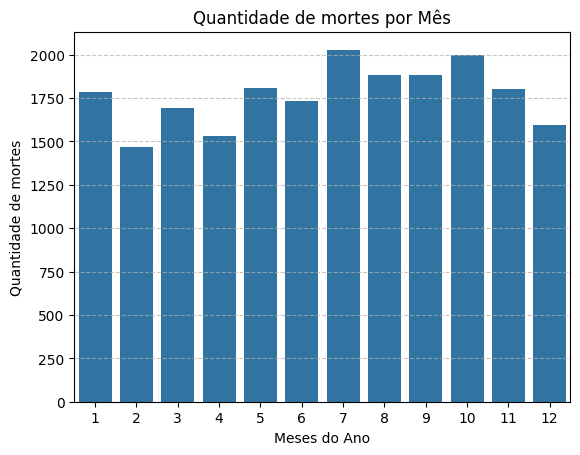

In [155]:
ax = sns.countplot(x=df_obt['data_inversa'].dt.month, color='#1F77B4')

plt.xlabel('Meses do Ano')
plt.ylabel('Quantidade de mortes')
plt.title('Quantidade de mortes por Mês')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

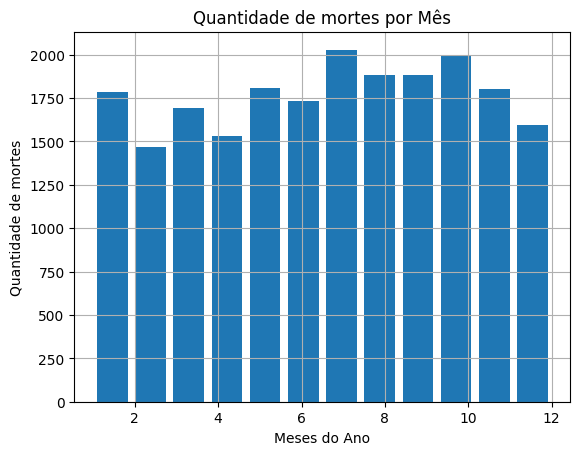

In [156]:
# Gráfico com as mesmas informações do anterior mas utilizando outra opção de código.

df_obt['data_inversa'].dt.month.hist(rwidth=.8, bins= 12)

plt.xlabel('Meses do Ano')
plt.ylabel('Quantidade de mortes')
plt.title('Quantidade de mortes por Mês')

plt.show()

- No número de mortes entre os meses do ano podemos observar um aumento no segundo semestre, lembrando que como a fonte dos dados está atualizada até novembro de 2023, dezembro de 2023 não esta nesse estudo.

### Mortalidade por dias da semana

In [157]:
#número de mortes por dia da semana
df_obt['dia_semana'].value_counts()

dia_semana
domingo          4395
sábado           3897
sexta-feira      3105
segunda-feira    2694
quinta-feira     2477
quarta-feira     2365
terça-feira      2260
Name: count, dtype: int64

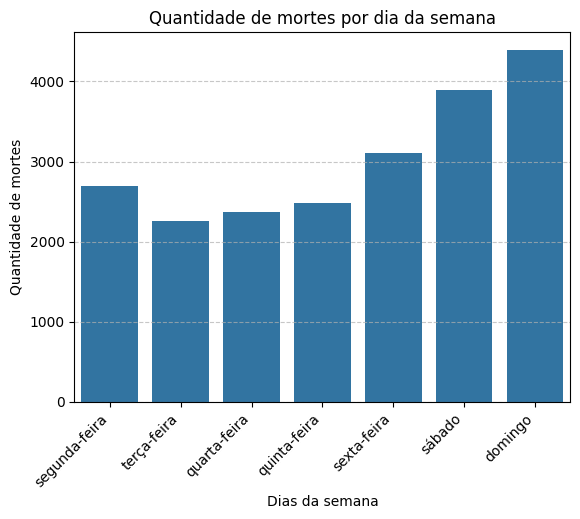

In [158]:
semana_dias = ['segunda-feira', 'terça-feira', 'quarta-feira', 'quinta-feira', 'sexta-feira', 'sábado', 'domingo']
ax = sns.countplot(x=df_obt['dia_semana'], color='#1F77B4', order=semana_dias)

plt.xlabel('Dias da semana')
plt.ylabel('Quantidade de mortes')
plt.title('Quantidade de mortes por dia da semana')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [159]:
fds = ['sexta-feira', 'sábado', 'domingo']
soma_fds = df_obt['dia_semana'][df_obt['dia_semana'].isin(fds)].count()
total = df_obt.shape[0]
porcentagem = int((soma_fds / total) * 100)
print(f"A quantidade de mortes aos finais de semana é {soma_fds}, o que corresponde a {porcentagem}% do total de mortes.")



A quantidade de mortes aos finais de semana é 11397, o que corresponde a 53% do total de mortes.


O número de mortes é maior no decorrer dos finais de semana (sexta, sábado, domingo), a causa para isso é provavelmente por serem dias em que há um aumento no número de pessoas viajando e passeios com carros próprios.

### Mortalidade por Hora

In [160]:
# quantidade de mortes em cada hora
df_obt['horario'].dt.hour.value_counts()

horario
19    1795
18    1766
20    1381
21    1106
17    1046
22     989
15     914
5      913
6      906
23     858
16     854
14     829
7      802
4      731
13     686
12     682
11     660
3      655
0      643
10     610
1      603
8      599
9      595
2      570
Name: count, dtype: int64

In [161]:
# filtrando um dataframe para o horário de pico
hr_pico = [18, 19, 20]
df_hr_pico = df_obt[df_obt['horario'].dt.hour.isin(hr_pico)]

In [162]:
# calculando a porcentagem de mortes durante acidentes que ocorrem no horário de pico noturno
porc_hr_pico = round(df_hr_pico.shape[0]/df_obt.shape[0]*100, 2)
porc_hr_pico

23.32

In [168]:
print('Número de mortes em decorrência de acidentes que ocorrem no horário do pico noturno (entre 18h00 as 20h59) é  {} \nque corresponde a {}% do total.'.format(df_hr_pico.shape[0], porc_hr_pico ))


Número de mortes em decorrência de acidentes que ocorrem no horário do pico noturno (entre 18h00 as 20h59) é  4942 
que corresponde a 23.32% do total.


In [164]:
# filtrando Dataframe para finais de semana
fds=['sexta-feira', 'sábado', 'domingo']
df_fds = df_obt[df_obt['dia_semana'].isin(fds)]

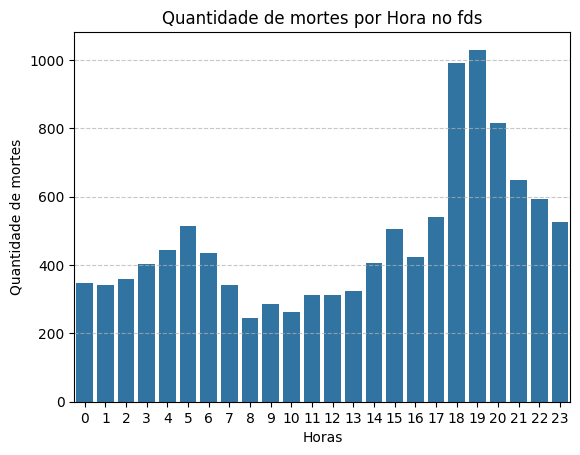

In [166]:
# Gráfico de mortes por hora apenas aos finais de semana
ax = sns.countplot(x=df_fds['horario'].dt.hour, color='#1F77B4')

plt.xlabel('Horas')
plt.ylabel('Quantidade de mortes')
plt.title('Quantidade de mortes por Hora no fds')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

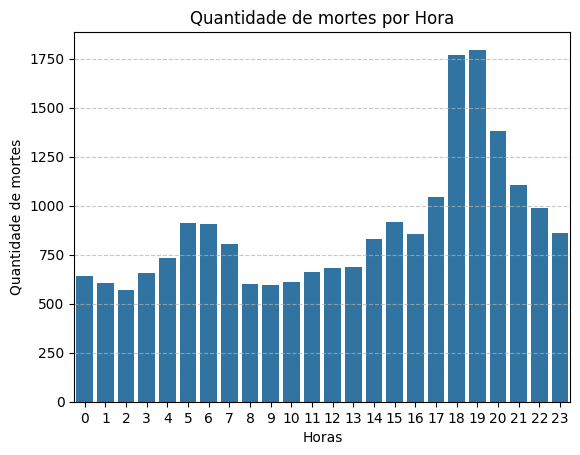

In [167]:
# Gráfico de mortes por hora incluindos todos os dias da semana
ax = sns.countplot(x=df_obt['horario'].dt.hour, color='#1F77B4')

plt.xlabel('Horas')
plt.ylabel('Quantidade de mortes')
plt.title('Quantidade de mortes por Hora')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

- Já em relação ao horário em que ocorreram os acidentes dessas mortes, o maior volume ocorre no horário do pico noturno entre 18h00 à 20h59, onde 18h tem 8,3%, 19h tem 8,5% e 20h 6,5%, totalizando 23,3% dos casos de mortes, que em números resulta em 4942 mortes. E se formos nos aprofundar para os finais de semana , pelo gráfico podemos ver que a tendência segue a mesma.


### Mortalidade por Idade

<Axes: >

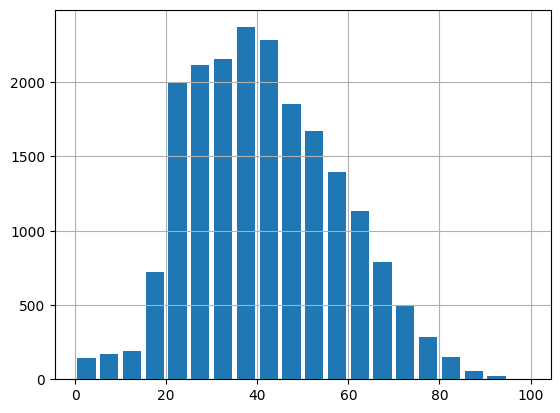

In [169]:
df_obt['idade'].hist(rwidth=.8, bins=np.arange(0,101,5))

In [170]:
df_obt['idade'].value_counts()

idade
36.0      504
40.0      479
38.0      478
41.0      477
35.0      476
         ... 
1947.0      1
911.0       1
949.0       1
123.0       1
99.0        1
Name: count, Length: 105, dtype: int64

In [171]:
#gráfico completo com a porcentagem

def graf(dataframe, columns, head = 10, xlabelrotation = 90, graficos_por_linha=2):

    """
    Plota um conjunto de gráficos de barras, um gráfico para elemento fornecido pelo parâmetro columns.
    :param dataframe => DataFrame ao qual serão gerados os gráficos
    :columns => lista de colunas ou variáveis que serão criados os gráficos
    :head => quantidade de elementos de cada columns que será exibido nos gráficos
    :figsize => tamanho da figura como um todo
    :xlabelrotation => a rotação do label no eixo X

    """

    n = len(columns) # Número de colunas
    sqrt_n = np.sqrt(n) # Raiz quadrada de n

    # Calcula o número de linhas e colunas para os subplots
    num_rows = -(-len(columns) // graficos_por_linha) 
    num_cols = min(len(columns), graficos_por_linha) 

    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 6 * num_rows)) # Cria uma figura com subplots

    for i, coluna in enumerate(columns):
        row = i // num_cols # Índice da linha do subplot
        col = i % num_cols # Índice da coluna do subplot

        x = dataframe[coluna].value_counts().head(head)
        total = len(dataframe[coluna]) # Total de todos os valores da coluna
        # total = x.sum() # Total de contagens para calcular as porcentagens

        bars = x.plot(kind='bar', ax=axs[row, col]) # Guarda as barras do gráfico
        axs[row, col].set_ylim(0, max(df_obt[coluna].value_counts().head(head)) * 1.1)  # Ajusta a altura da barra. útil para enquadrar a porcentagem sobre as barras
        axs[row, col].grid(axis='y', linestyle='--', alpha=0.6)
        axs[row, col].set_title(coluna)
        axs[row, col].set_xticklabels(axs[row, col].get_xticklabels(), rotation=0)

        # Adiciona as porcentagens dentro das barras
        for bar in bars.patches:
            yval = bar.get_height()
            percent = yval / total * 100
            axs[row, col].text(bar.get_x() + bar.get_width() / 2, yval -0.3,
                               f'{percent:.1f}%', ha='center', va='bottom')

        axs[row, col].set_title(coluna) # Define o título do gráfico
        # Rotaciona os rótulos do eixo x em 45 graus
        axs[row, col].set_xticklabels(axs[row, col].get_xticklabels(), rotation=xlabelrotation)

    #plt.subplots_adjust(hspace=1.0) # Ajusta o espaçamento vertical entre os subplots
    plt.tight_layout() # Ajusta o layout para evitar sobreposição
    plt.show() # Mostra os gráficos


In [172]:
columns_grafBarras = ['br','uf', 'municipio', 'causa_acidente', 'tipo_acidente', 'fase_dia',
       'sentido_via', 'condicao_metereologica', 'tipo_pista', 'tracado_via',
       'uso_solo','tipo_veiculo', 'tipo_envolvido', 'sexo']

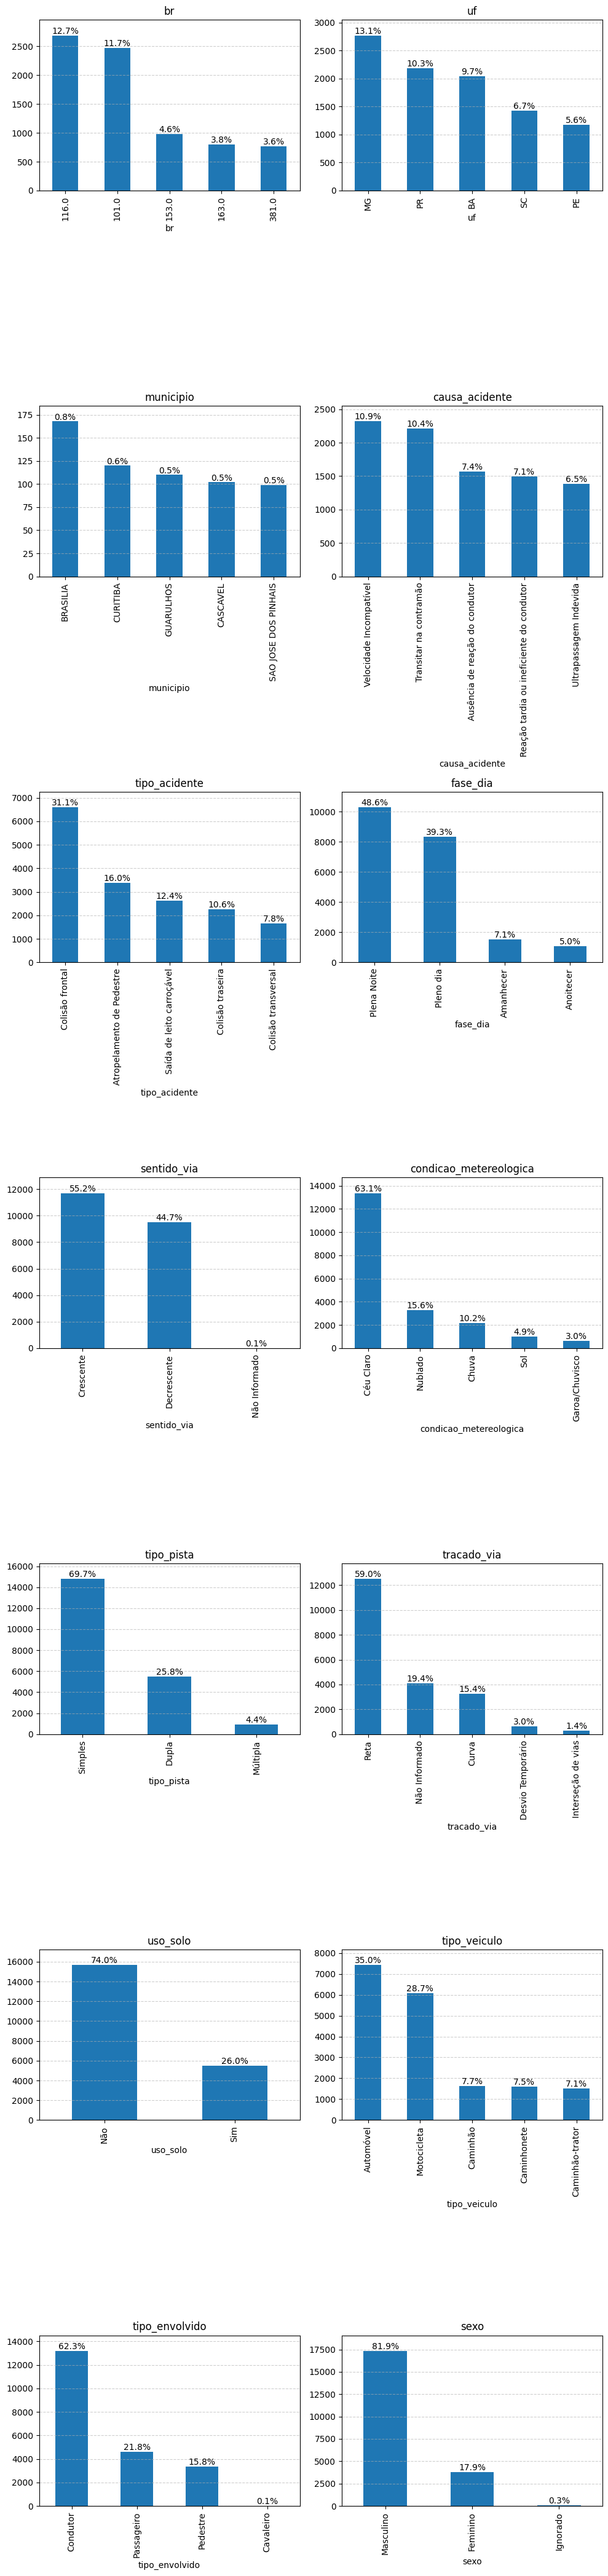

In [174]:
graf(df_obt, columns_grafBarras, head = 5,  xlabelrotation = 90)

- O estado com mais casos de mortes é MG com 13,1% seguido por PR com 10,3% e BA com 9,7%.

- Em relação as rodovias, no topo das mais fatais temos duas com a diferença de 1%, a BR116 com 12,7% e a BR101 com 11,7%, a terceira vem bem atrás BR153 com 4,7%.

- As três maiores causas nos acidentes que levaram a mortes foram velocidade incompatível, transitar na contramão e ausência de reação do condutor.

- Os dois maiores tipos de acidentes que causaram mortes foram colisão frontal com 31% e atropelamento de pedestre com 16%, ou seja quase o dobro entre os dois principais tipos de acidentes.

- Em relação a Fase do dia quase 90% desses acidentes ocorreram em plena noite e pleno dia, 48,6% e 39,3% respectivamente. E a condição metereológica com maior número de acidentes foi Céu claro com 62,9%.

- Já em relação ao tipo de pista, 69,7% dos acidentes ocorreram em pistas simples e 25,8% em pistas duplas. E em mais da metade desses acidentes foram em pista reta.

- Carros e motocicletas são os tipos de veículos que mais se envolvem em acidentes, sendo carros em 35% e motocicletas em 28,7% dos acidentes.

- Os condutores são os mais afetados nesses acidentes fatais com 62,3% das mortes, seguido dos passageiros com 21,8% e pedestres com 15,8%. 

- O número de homens que morre em acidentes de trânsito é muito superior ao de mulheres, são 81,9% de mortes do sexo masculino contra 17,9% mortes do sexo feminino.

## Recomendações

- Focar em estratégias de prevenção de acidentes no horário do pico noturno, como aumento da visibilidade nas rodovias e educação para condutores sobre os riscos associados a esse período.

- Reforçar a fiscalização e implementar medidas de segurança, como melhorias na sinalização e condições da pista, principalmente nas BR-116 e BR-101.

- Investir em programas educacionais e campanhas de conscientização sobre as principais causas de acidentes, com ênfase em velocidade incompatível, transitar na contramão e reação do condutor.

- Incentivar a colaboração entre governos, autoridades e comunidades para um trânsito mais seguro.